# Research of Apartment Sale Listings

We have at our disposal data from the Yandex.Real Estate service—an archive of apartment sale listings in Saint Petersburg and nearby localities over several years. You need to learn how to determine the market value of real estate properties. Your task is to establish the parameters. This will enable the construction of an automated system: it will detect anomalies and fraudulent activities.

For each apartment on sale, two types of data are available. The first is entered by the user, and the second is obtained automatically based on mapping data. For example, the distance to the city center, airport, nearest park, and body of water.


# Table of Contents

- [Introduction](#Introduction)
- [Chapter 1](#ИStudying-General-Information)
- [Chapter 2](#Data-preprocessing)
- [Chapter 3](#Dataset-enrichment) 
- [Chapter 4](#ИExploratory-Data-Analysis)
- [Chapter 5](#The-speed-of-apartment-sales)
- [Chapter 6](#ОDetermining-factors-influencing-the-total-price-of-the-property.)
- [Chapter 7](#Top-10-cities-with-the-most-advertisements)
  
- [Conclusion](#General-conclusion)

# Introduction
Project: Exploratory Data Analysis

Research of Apartment Sale Listings

For the exploratory data analysis, we will use data from the Yandex Real Estate service—an archive of apartment sale listings in Saint Petersburg and nearby localities over several years.

We need to learn how to determine the market value of real estate properties. To do this, we will conduct an exploratory data analysis and establish the parameters affecting the price of the properties.

Our work will consist of the following stages:

Studying general information about the received dataframe;
Data preprocessing (finding and filling in missing values, changing data types where necessary, eliminating duplicates);
Enriching the table with new data;
Conducting an exploratory data analysis (how quickly apartments were sold, determining the factors that most affect the total (full) cost of the property, finding the price dependence on specified parameters).
General conclusion on the work done.


## Studying General Information

In [208]:
import pandas as pd
import matplotlib.pyplot as plt





Let's read the file real_estate_data.csv and save it in the variable data. Then, we will display the general information about the dataset.

In [209]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's examine the obtained information in more detail.

The table contains a total of 22 columns with the following data types: bool (2), float64 (14), int64 (3), object (3).

Let's specify the number of explicit duplicates.

In [210]:
data.duplicated().sum()

0

Let's output the first 20 lines of the dataset.

In [211]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Let's plot histograms for all numerical columns.

'plt.tight_layout()' is used to automatically adjust the layout of the plots on the figure so that they do not overlap.

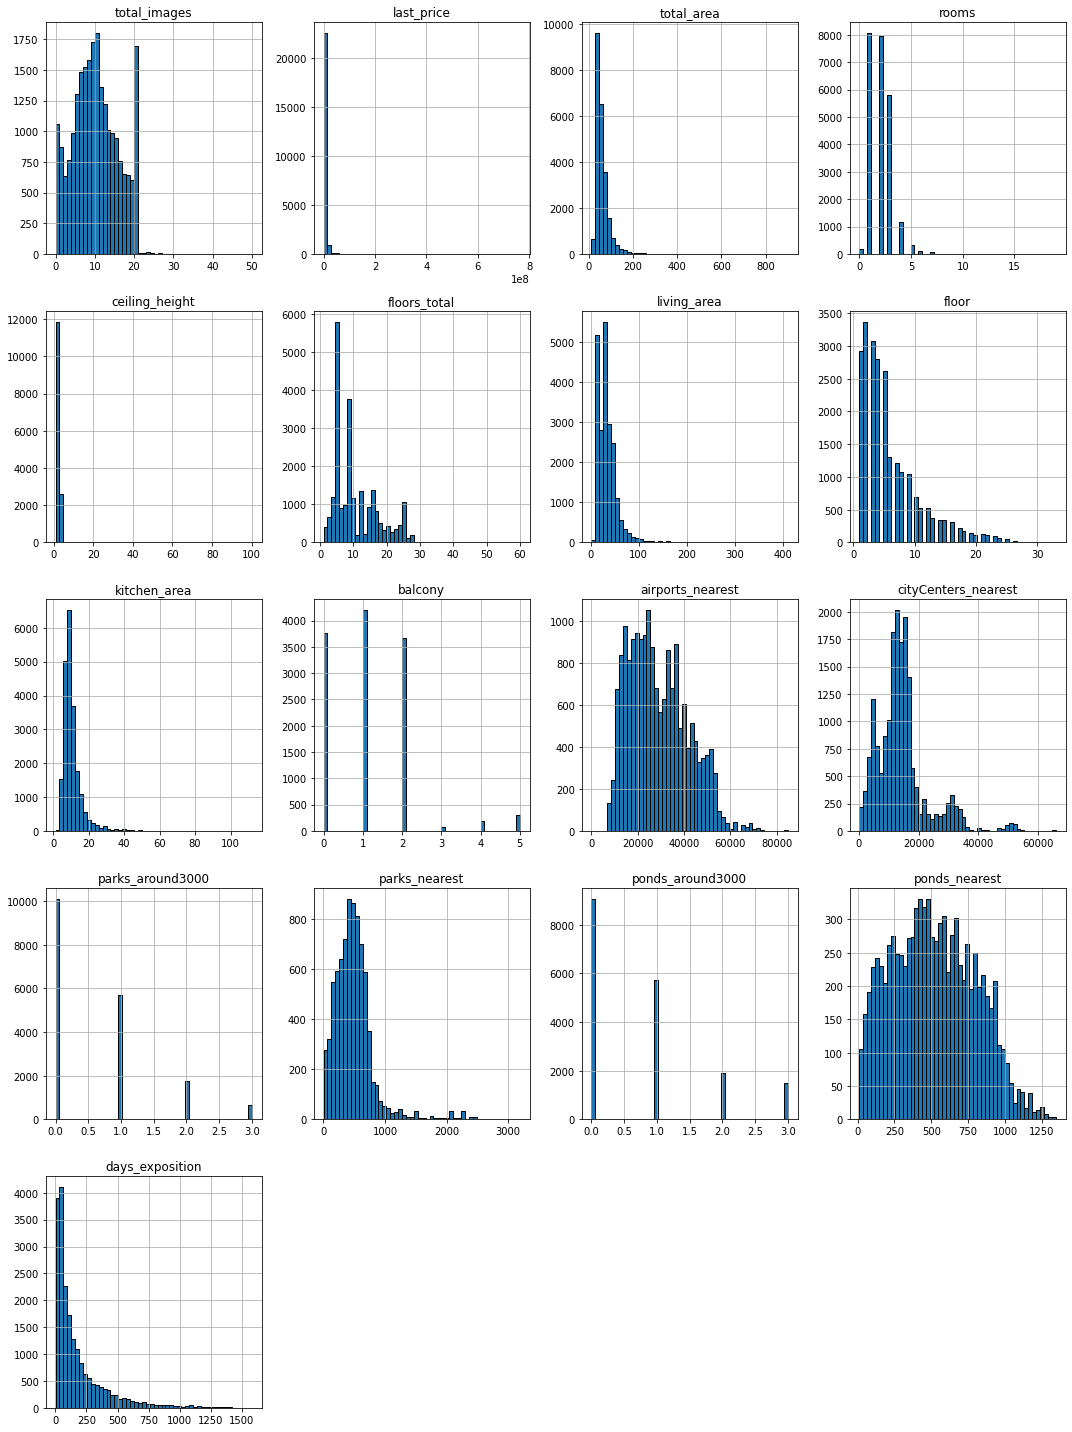

In [212]:
data.hist(figsize=(15, 20), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()



**Conclusion:**

There are 23,699 records in the data. Some columns have missing values and incorrect data types.

From the histograms, it is evident that there are anomalous values in the data. There are no explicit duplicates. The data is deemed complete and sufficient for analysis.

## Data preprocessing

Let's clarify the number of missing values.

In [213]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [214]:
missing_values = data.isna().sum()
missing_percentage = (data.isna().sum() / len(data)) * 100

In [215]:
# Создание DataFrame для удобного отображения
missing_data = pd.DataFrame({
    'missing_values': missing_values,
    'missing_percentage': missing_percentage
})

# Сортировка по количеству пропусков
missing_data_sorted = missing_data.sort_values(by='missing_values', ascending=False)

# Вывод результата
print(missing_data_sorted)

                      missing_values  missing_percentage
is_apartment                   20924           88.290645
parks_nearest                  15620           65.909954
ponds_nearest                  14589           61.559559
balcony                        11519           48.605426
ceiling_height                  9195           38.799105
airports_nearest                5542           23.384953
cityCenters_nearest             5519           23.287902
ponds_around3000                5518           23.283683
parks_around3000                5518           23.283683
days_exposition                 3181           13.422507
kitchen_area                    2278            9.612220
living_area                     1903            8.029875
floors_total                      86            0.362885
locality_name                     49            0.206760
total_images                       0            0.000000
last_price                         0            0.000000
studio                         

In the "balcony" column, we can assume that users did not specify the number of balconies because there are none. Therefore, we will replace such missing values with 0

In [216]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Первая строка кода выполняет следующие действия:

data['balcony']: Обращается к столбцу balcony в DataFrame data.
.fillna(0): Метод fillna() используется для замены всех значений NaN (отсутствующих значений) в столбце balcony на 0.
data['balcony'] = ...: Присваивает результат обратно в столбец balcony, обновляя его.


Вторая строка кода следующие действия:

1) data.isnull(): Метод isnull() создает DataFrame того же размера, что и data, где каждое значение — это булево значение: True если значение пропущено (NaN), и False в противном случае.

2) .sum(): Метод sum() примененный к DataFrame с булевыми значениями подсчитывает количество True (т.е. количество пропущенных значений) для каждого столбца.

То есть эта строка кода возвращает серию, где индексами являются имена столбцов, а значениями — количество пропущенных значений в каждом столбце.    

Переименуем название столбца cityCenters_nearest на city_centers_nearest

In [217]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

In [218]:
data.rename(columns = {'ponds_around3000':'ponds_around_3000'}, inplace = True )

In [219]:
data.rename(columns = {'parks_around3000':'parks_around_3000'}, inplace = True )

Let's change the data type of the 'last_price' column to integer.

In [220]:
data['last_price'] = data['last_price'].astype(int)

In [221]:
data['last_price'] = data['last_price'].fillna(data['last_price'].median())

В столбце first_day_exposition округлим дату и время.

In [222]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
data['first_day_exposition'] = data['first_day_exposition'].dt.ceil('1H')

Первая строка кода выполняет следующие действия:

pd.to_datetime(): Эта функция используется для преобразования столбца или серии значений в формат даты и времени (datetime).
data['first_day_exposition']: Указывает, что нужно преобразовать значения в столбце first_day_exposition DataFrame data.
format='%Y-%m-%dT%H:%M': Задает формат входных данных для правильного их преобразования

Вторая строка кода округляет каждое значение в столбце first_day_exposition до ближайшего часа:


data['first_day_exposition']: Обращается к столбцу first_day_exposition в DataFrame data, который теперь содержит объекты datetime.
.dt: Доступ к атрибутам datetime в pandas Series.
.ceil('1H'): Округляет значения даты и времени вверх до ближайшего часа.


We will replace missing values in the 'ceiling_height' column with the median value and round to 1 decimal place.

In [223]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].round(1)

We will remove rows with missing values in the 'floors_total' column from the dataset. 

In [224]:
data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'].isnull().sum()

0

We will replace missing values in the 'living_area' column with the mean ratio of living area to total area and change the data type to integer.

In [225]:
mean_living_for_total = ((data['living_area'] / data['total_area']).mean())

In [226]:
data['living_area'] = data['living_area'].fillna(value=(mean_living_for_total * data['total_area'])).round(0)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.6,11.0,19.0,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.6,5.0,34.0,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.6,14.0,90.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.0,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,2.6,5.0,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,2.6,3.0,30.0,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.0,17.0,43.0,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Missing values in the 'is_apartment' column can also be replaced with 0, assuming users left this field empty due to a lack of understanding of what an apartment is.

In [227]:
data['is_apartment'] = data['is_apartment'].fillna(0)

We will replace missing values in the 'kitchen_area' column with the mean ratio of kitchen area to total area.

In [228]:
data.dropna(subset = ['kitchen_area'], inplace = True)
data['kitchen_area'].isnull().sum()

0

In [229]:
# Создание нового столбца для суммы площадей
data['sum_areas'] = data['kitchen_area'] + data['living_area']

In [230]:
# Проверка, где сумма площадей превышает общую площадь
data['exceeds_total_area'] = data['sum_areas'] > data['total_area']

In [231]:
# Вывод строк, где сумма площадей превышает общую площадь
exceeds_total = data[data['exceeds_total_area']]

print(exceeds_total)

       total_images  last_price  total_area first_day_exposition  rooms  \
184               7     2600000       30.20           2018-02-14      1   
545               9     4700000       23.80           2018-12-28      1   
551               8     3100000       31.59           2018-03-08      1   
601              12     5600000       53.70           2017-04-18      2   
696               1     3364930       34.69           2014-11-27      1   
...             ...         ...         ...                  ...    ...   
21915            14    11990000       91.40           2016-05-16      2   
21956             0     5200000       46.00           2018-07-20      2   
22399            12      850000       54.80           2019-01-26      3   
23108             4     2950000       33.95           2019-02-12      1   
23202            13     4919880       67.92           2018-10-23      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
184               2.6 

Let's delete rows with missing values in the 'locality_name' column.

In [232]:
data.dropna(subset = ['locality_name'], inplace = True)
data['locality_name'].isnull().sum()

0

We will leave missing values in the 'airports_nearest' column unchanged. The absence of filled values likely indicates that either there is no airport in the locality or it is located very far away.

In [233]:
data['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
4        31856.0
5            NaN
          ...   
23693    45602.0
23694    24665.0
23695        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 21343, dtype: float64

We will leave missing values in the 'citycenters_nearest' column unchanged for now.

In [234]:
data['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
4         8098.0
5            NaN
          ...   
23693    34104.0
23694     4232.0
23695        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 21343, dtype: float64

Missing values in the 'parks_around3000' column, indicating the number of parks within a 3 km radius, suggest that there are likely no parks within this distance. We can fill these missing values with 0.

In [235]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)

Missing values in the 'parks_nearest' column, indicating the distance to the nearest park in meters, suggest that there are likely no parks within this distance. We can fill these missing values with 0.

In [236]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].astype(int)

Missing values in the 'ponds_around3000' column, indicating the number of ponds within a 3 km radius, likely suggest that there are no ponds within this distance. We can fill these missing values with 0.

In [237]:
data['ponds_around3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Missing values in the 'ponds_nearest' column, indicating the distance to the nearest pond in meters, likely suggest that there are no ponds within this distance. We can fill these missing values with 0.

In [238]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)

Missing values in the 'days_exposition' column might indicate that the listing is still active. Therefore, we will replace these missing values with 0.

In [239]:
data['days_exposition'] = data['days_exposition'].fillna(0)

In [240]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4816
city_centers_nearest    4795
parks_around_3000          0
parks_nearest              0
ponds_around_3000       4794
ponds_nearest              0
days_exposition            0
sum_areas                  0
exceeds_total_area         0
ponds_around3000           0
dtype: int64

Let's display all unique values in the 'locality_name' column and then keep only the names.

In [241]:
unique_values = data['locality_name'].unique()
print(unique_values)

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Колпино' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный'
 'деревня Старая' 'деревня Лесколово' 'село Путилово' 'Ивангород' 'Мурино'
 'Сланцы' 'Шлиссельбург' 'Сясьстрой' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'посёлок Бугры' 'поселок Бугры'
 'поселок городского типа 

In [242]:
# 1) перевод в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

In [243]:
# 2) Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при ж/д станции ', 'платформа ', 'СНТ ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# 3) Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())



{'69-й километр',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная го

**ВConclusion:**

During the data preprocessing:

- Renamed the column 'cityCenters_nearest' to 'city_centers_nearest'.
- Filled explicit missing values in the table (filled missing values in columns: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, locality_name, parks_around3000, ponds_around3000, days_exposition), rounding values to significant figures.
- Adjusted data types according to the data present in the columns.

## Dataset enrichment

Add a column 'price_square_meter' with the price per square meter of the property, rounded to two decimal places

In [244]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  52542.37, 149511.4 ,
        41795.67])

Add columns for the day of the week, month, and year of the publication of the advertisement

In [245]:
data['day_publication'] = data['first_day_exposition'].dt.day
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

Verify the resulting values

In [246]:
data['day_publication'].unique()

array([ 7,  4, 20, 19, 10,  2, 18, 23, 26, 16, 27, 30,  1,  9, 28, 14, 24,
       29, 31, 12, 13, 22, 15, 25,  8,  3, 17,  5, 11,  6, 21])

In [247]:
data['month_publication'].unique()

array([ 3, 12,  8,  6,  9, 11,  4,  5,  2,  7,  1, 10])

In [248]:
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

Add a column to the table indicating the floor of the apartment with categories: "first", "last", or "other".

In [249]:
#Создадим функцию, которая будет возвращать этаж квартиры, сгрупированный по вариантам — первый, последний, другой
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [250]:
data['floor_group'] = data.apply(floor_group, axis=1) 
data['floor_group'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Add a column 'distance_city_center' indicating the distance to the city center in kilometers (convert from meters to kilometers and round to the nearest integer).

In [251]:
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  8., nan, 12., 15., 52., 33., 31., 11., 13., 10.,
        2., 32.,  4., 17., 30.,  7.,  5., 51., 50., 24.,  9., 28.,  3.,
        6., 27., 21., 49., 35., 36., 34., 18.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 43., 48., 62.,
       60., 39., 42., 65., 41., 54., 59., 61., 63.])

**Вывод**
1. Calculated and added a column for the price per square meter of each property (price_square_meter).
2. Extracted day, month, and year of publication into separate columns (day_publication, month_publication, year_publication).
3. Added information about the floor type of the apartment (first, last, other) to the table.
4. Calculated and added a column for the distance to the city center in kilometers.

## Exploratory Data Analysis

Studying and describing the dependence of the number of apartments for sale on specific parameters:

Analysis of total area

In [252]:
data['total_area'].describe()

count    21343.000000
mean        60.708130
std         35.018318
min         14.000000
25%         40.530000
50%         52.390000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

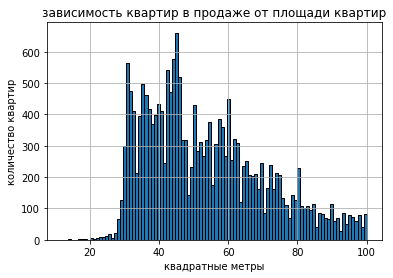

In [253]:
plt.hist(data['total_area'], bins=100, range=(12,100), edgecolor='black')
plt.grid(True)

plt.title('зависимость квартир в продаже от площади квартир')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

The largest supply of apartments on the market is in the range of 40 to 69 square meters, with a peak around 52 square meters

Analysis of living area

In [254]:
data['living_area'].describe()

count    21343.000000
mean        34.737291
std         22.150563
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        410.000000
Name: living_area, dtype: float64

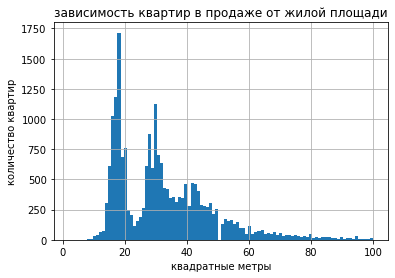

In [255]:
plt.hist(data['living_area'], bins=100, range=(2,100))
plt.grid(True)
plt.title('зависимость квартир в продаже от жилой площади')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The highest number of apartments for sale have a living area of approximately 18 square meters and 30-40 square meters.

Analysis of kitchen area

In [256]:
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

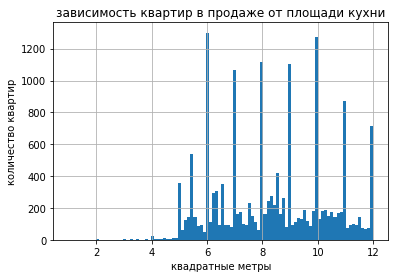

In [257]:
plt.hist(data['kitchen_area'], bins=100, range=(1,12))
plt.grid(True)
plt.title('зависимость квартир в продаже от площади кухни')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The majority of apartments for sale have kitchen areas of 6 and 8 square meters. Following these are apartments with kitchen areas of 10-12 square meters.

Analysis of price

In [258]:
data['last_price'].describe()

count    2.134300e+04
mean     6.540169e+06
std      9.737580e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

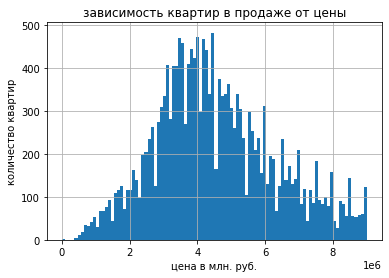

In [259]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.grid(True)
plt.title('зависимость квартир в продаже от цены')
plt.xlabel('цена в млн. руб.')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

From the histogram, it is evident that the most common price range for properties is between 3 to 5 million rubles.

Number of rooms

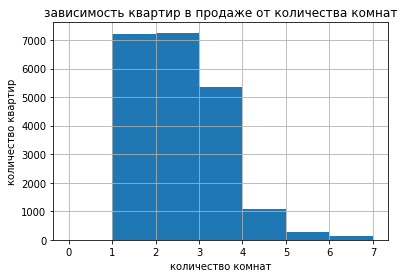

In [260]:
plt.hist(data['rooms'], bins=7, range=(0,7))
plt.grid(True)
plt.title('зависимость квартир в продаже от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

Conclusion

Among the listings, there are the most offers for 1-room, 2-room, and 3-room apartments.

Ceiling height

In [261]:
data['ceiling_height'].describe()

count    21343.000000
mean         2.707440
std          0.988529
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

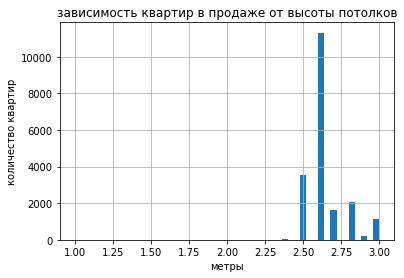

In [262]:
plt.hist(data['ceiling_height'], bins=50, range=(1,3))
plt.grid(True)
plt.title('зависимость квартир в продаже от высоты потолков')
plt.xlabel('метры')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The majority of listings consist of apartments with ceiling heights between 2.50 to 2.60 meters.

Floor type of the apartment ("first", "last", "other")

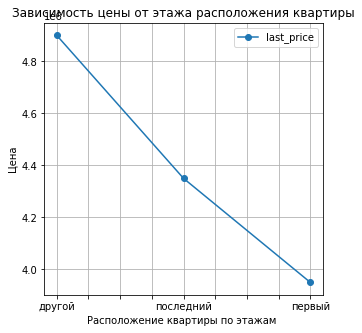

In [263]:
(
    data.pivot_table(index='floor_group', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

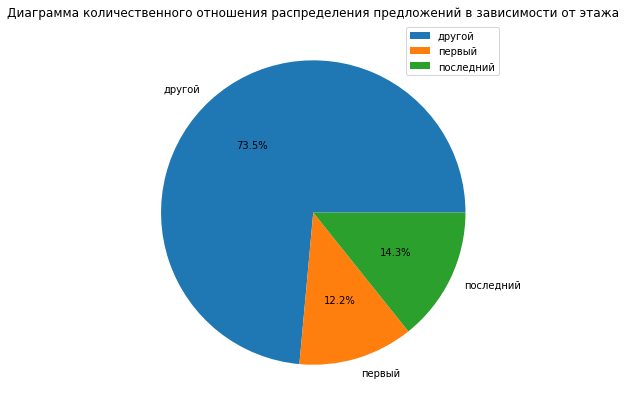

In [264]:
data.pivot_table(index='floor_group',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', autopct='%1.1f%%', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')
          
plt.show()

Conclusion:

Listings for apartments on the first and last floors are less common. These listings account for slightly more than 25% of the total number of listings.

Total number of floors in the building

In [265]:
data['floors_total'].describe()

count    21343.000000
mean        10.588671
std          6.532087
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

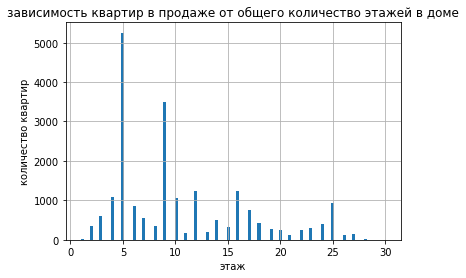

In [266]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.grid(True)
plt.title('зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The highest number of listings for apartments are in buildings with 5 and 9 floors.

Distance to the city center in meters

In [267]:
data['city_centers_nearest'].describe()

count    16548.000000
mean     14224.502478
std       8651.597902
min        181.000000
25%       9289.000000
50%      13094.500000
75%      16268.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

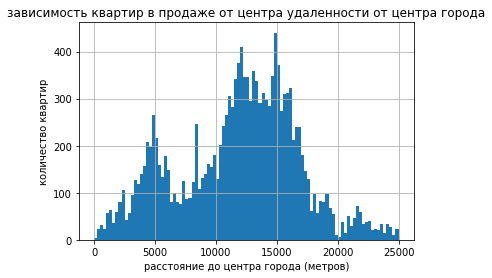

In [268]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,25000))
plt.grid(True)
plt.title('зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('расстояние до центра города (метров)')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The highest number of listings for sale are in residential districts, particularly at distances of 12,000 to 15,000 meters from the city center, as well as at a distance of 5,000 meters from the city center.

Distance to the nearest park

In [269]:
data['parks_nearest'].describe()

count    21343.000000
mean       168.476175
std        305.852739
min          0.000000
25%          0.000000
50%          0.000000
75%        306.000000
max       3190.000000
Name: parks_nearest, dtype: float64

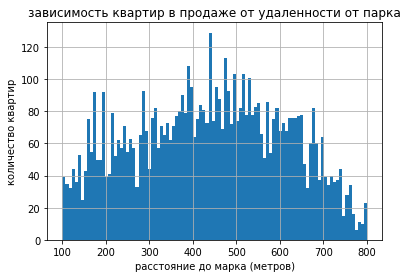

In [270]:
plt.hist(data['parks_nearest'], bins=100, range=(100,800))
plt.grid(True)
plt.title('зависимость квартир в продаже от удаленности от парка')
plt.xlabel('расстояние до марка (метров)')
plt.ylabel('количество квартир')
plt.show()

Conclusion:

The number of listings does not vary significantly based on the distance to the nearest park. The average distance to the park is approximately 200 to 700 meters.

**Оverall Conclusion for the Section:**

On the market, the largest supply of apartments falls within the total area range of 40 to 69 square meters, with a peak around 52 square meters.

The majority of apartments for sale have a living area of approximately 18 square meters and 30 square meters.

There is a notable trend towards offering apartments with kitchen areas of 6 to 10 square meters.

From the histogram, it is evident that the most common price range for properties is between 3 to 5 million rubles.

Among the listings, there are the most offers for 1 to 3-room apartments.

Ceiling heights mostly range around 2.6 meters in the majority of listings.

Apartments on the first and last floors are less preferred.

The highest number of listings for sale are in buildings with 5 and 9 floors, predominantly located in residential areas on the outskirts of the city, with a significant concentration at a distance of 5,000 meters from the city center.

The number of listings does not vary significantly based on the distance to the nearest park, with the average distance being approximately 200 to 700 meters.

In conclusion: The average listing is a 52-square-meter apartment in a five-story building with a kitchen area of 6 square meters, ceiling height of 2.6 meters, 1 to 3 rooms, located around 13 km from the city center.

## The speed of apartment sales

In [271]:
print(data['days_exposition'].describe())

count    21343.000000
mean       159.607693
std        216.149617
min          0.000000
25%         21.000000
50%         78.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64


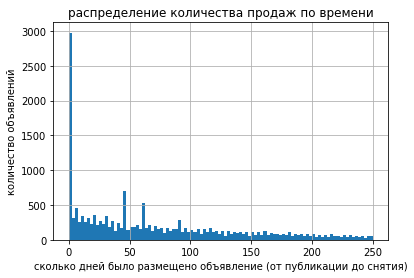

In [272]:
plt.hist(data['days_exposition'], range=(0,250), bins=100, )
plt.grid(True)
plt.title('распределение количества продаж по времени')
plt.xlabel('сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('количество объявлений')
plt.show()

В выводе по времени продажи квартир:

Среднее время продажи квартиры составляет 156 дней, однако медианное значение составляет 74 дня, что более точно отражает среднее время продажи, не учитывая выбросы и нестандартные значения.

В среднем, продажа типичной квартиры занимает от 2 до 3 месяцев, в зависимости от таких факторов, как площадь, цена и удаленность от центра.

Быстрыми продажами можно считать те, которые происходят в первом квартиле времени продаж (около 30 дней), а необычно долгими — продажи, которые занимают более 199 дней (после третьего квартиля).

## Determining factors influencing the total price of the property.

examine if the price ('last_price') depends on:

- Total area ('total_area')
- Living area ('living_area')
- Kitchen area ('kitchen_area')
- Number of rooms ('rooms')
- Floor type (first, last, other)
- Date of publication (day of the week, month, year)







In [273]:
data.corr()['last_price']

total_images            0.111832
last_price              1.000000
total_area              0.697314
rooms                   0.391024
ceiling_height          0.075586
floors_total            0.000237
living_area             0.612169
floor                   0.032337
studio                       NaN
open_plan                    NaN
kitchen_area            0.520362
balcony                 0.007225
airports_nearest       -0.028578
city_centers_nearest   -0.225768
parks_around_3000       0.209801
parks_nearest           0.123682
ponds_around_3000       0.172559
ponds_nearest           0.094853
days_exposition         0.054583
sum_areas               0.657699
exceeds_total_area     -0.005271
ponds_around3000        0.223849
price_square_meter      0.736277
day_publication        -0.000655
month_publication      -0.000806
year_publication       -0.040369
distance_city_center   -0.226293
Name: last_price, dtype: float64

In [274]:
correlation_matrix = data[['last_price', 'living_area', 'total_area', 'kitchen_area', 'rooms', 'floor', 'day_publication', 'month_publication', 'year_publication']].corr()

print(correlation_matrix)

                   last_price  living_area  total_area  kitchen_area  \
last_price           1.000000     0.612169    0.697314      0.520362   
living_area          0.612169     1.000000    0.942023      0.435720   
total_area           0.697314     0.942023    1.000000      0.609248   
kitchen_area         0.520362     0.435720    0.609248      1.000000   
rooms                0.391024     0.843739    0.765909      0.270342   
floor                0.032337    -0.088382   -0.014704      0.136545   
day_publication     -0.000655     0.000115   -0.000203      0.002552   
month_publication   -0.000806    -0.001309    0.003974      0.002476   
year_publication    -0.040369    -0.067163   -0.076173     -0.054781   

                      rooms     floor  day_publication  month_publication  \
last_price         0.391024  0.032337        -0.000655          -0.000806   
living_area        0.843739 -0.088382         0.000115          -0.001309   
total_area         0.765909 -0.014704        -0.

In [275]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

# Применяем стилизацию к DataFrame
styled_corr = correlation_matrix.style.apply(highlight_max, axis=0).apply(highlight_min, axis=0)
styled_corr

,last_price,living_area,total_area,kitchen_area,rooms,floor,day_publication,month_publication,year_publication
last_price,1.000000,0.612169,0.697314,0.520362,0.391024,0.032337,-0.000655,-0.000806,-0.040369
living_area,0.612169,1.000000,0.942023,0.435720,0.843739,-0.088382,0.000115,-0.001309,-0.067163
total_area,0.697314,0.942023,1.000000,0.609248,0.765909,-0.014704,-0.000203,0.003974,-0.076173
kitchen_area,0.520362,0.435720,0.609248,1.000000,0.270342,0.136545,0.002552,0.002476,-0.054781
rooms,0.391024,0.843739,0.765909,0.270342,1.000000,-0.142219,0.000866,-0.002283,-0.053384
floor,0.032337,-0.088382,-0.014704,0.136545,-0.142219,1.000000,0.000805,0.020066,0.009917
day_publication,-0.000655,0.000115,-0.000203,0.002552,0.000866,0.000805,1.000000,-0.022394,-0.020657
month_publication,-0.000806,-0.001309,0.003974,0.002476,-0.002283,0.020066,-0.022394,1.000000,-0.258613
year_publication,-0.040369,-0.067163,-0.076173,-0.054781,-0.053384,0.009917,-0.020657,-0.258613,1.000000


Preprocess the data and remove outliers

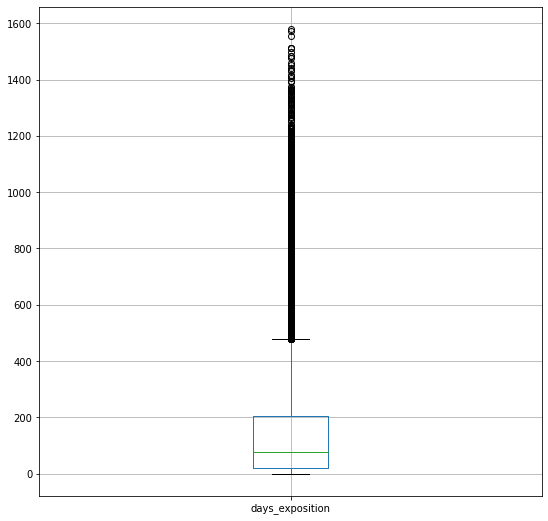

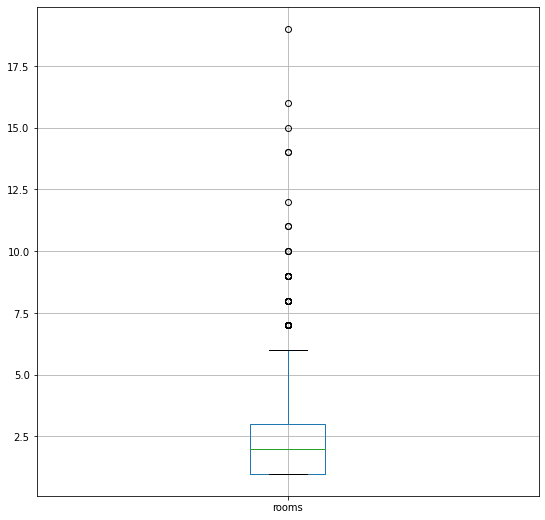

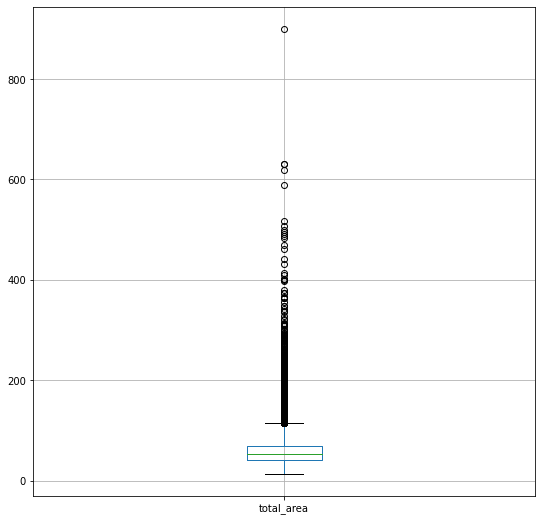

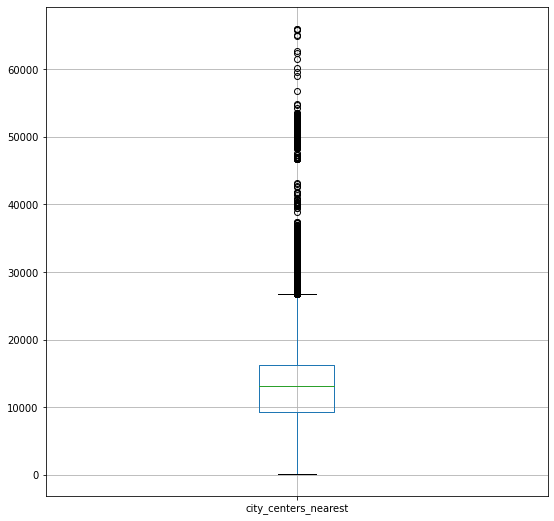

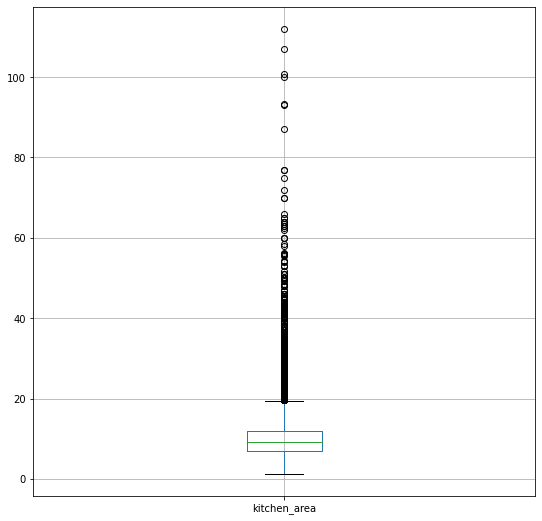

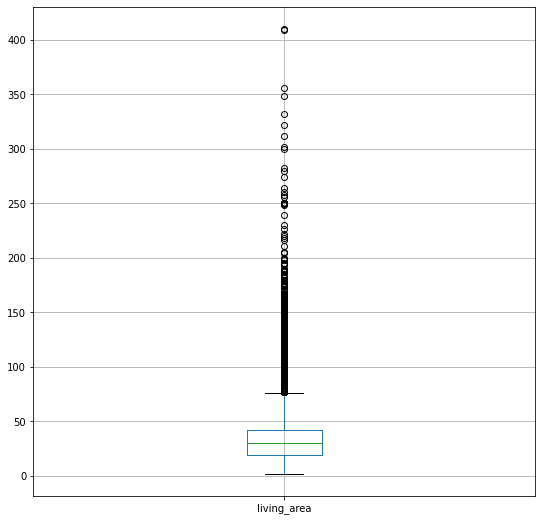

In [276]:
columns = ['days_exposition','rooms','total_area', 'city_centers_nearest', 'kitchen_area', 'living_area']

for column in columns:
    data.boxplot(column,figsize=(9,9))
    plt.show()

In [277]:
data = data.query('rooms < 6 and total_area < 250')

In [278]:
data.corr()['last_price']

total_images            0.125288
last_price              1.000000
total_area              0.663118
rooms                   0.366323
ceiling_height          0.080443
floors_total            0.029178
living_area             0.559452
floor                   0.043660
studio                       NaN
open_plan                    NaN
kitchen_area            0.522867
balcony                 0.020489
airports_nearest       -0.031434
city_centers_nearest   -0.263624
parks_around_3000       0.254899
parks_nearest           0.166359
ponds_around_3000       0.194506
ponds_nearest           0.118934
days_exposition         0.054945
sum_areas               0.631073
exceeds_total_area     -0.004006
ponds_around3000        0.260299
price_square_meter      0.806440
day_publication        -0.001348
month_publication       0.000636
year_publication       -0.040875
distance_city_center   -0.264401
Name: last_price, dtype: float64

The price of the apartment directly depends on the number of rooms and the total and living area of the apartment.

Examine the dependence of the apartment price on the following factors:

- Total area
- Living area
- Number of rooms
- Floor type
- Date of publication (month, year)

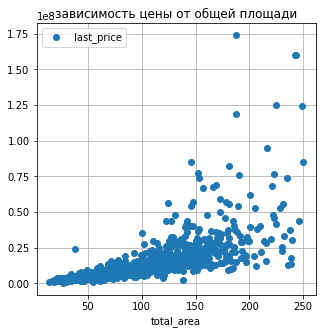

In [279]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('зависимость цены от общей площади')
plt.show()

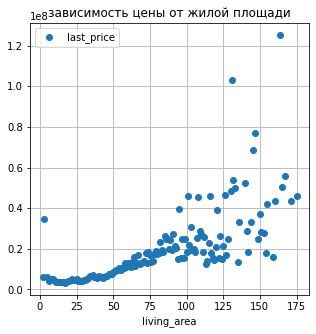

In [280]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('зависимость цены от жилой площади')
plt.show()

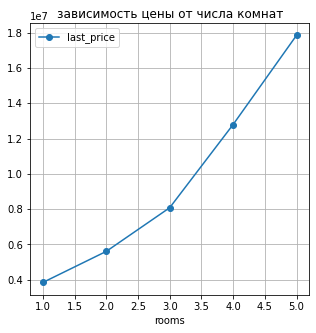

In [281]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('зависимость цены от числа комнат')
plt.show()

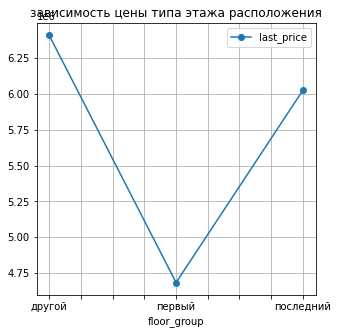

In [282]:
(
    data.pivot_table(index='floor_group', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('зависимость цены типа этажа расположения')
plt.show()

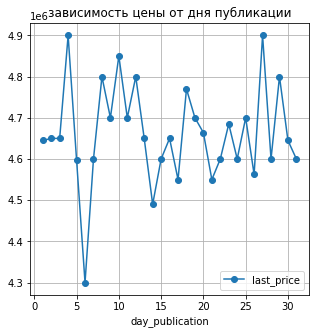

In [283]:
(
    data.pivot_table(index='day_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('зависимость цены от дня публикации')
plt.show()

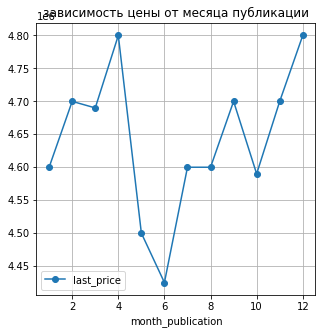

In [284]:
(
    data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('зависимость цены от месяца публикации')
plt.show()

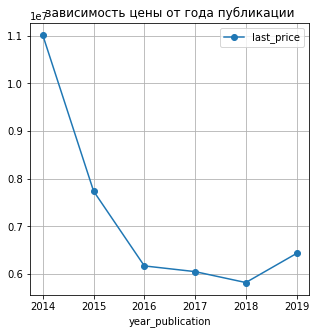

In [285]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('зависимость цены от года публикации')
plt.show()

Conclusion:
The graphs clearly show the following trends:

- With an increase in total and living area, as well as the number of rooms, the price of apartments tends to rise.
- Apartments on the first floor generally have lower prices, which is understandable given the older housing stock in 5 and 9-story buildings where these apartments are typically located.
- The price decrease for apartments on the top floor is less pronounced.
- Regarding the date of publication, there is typically an increase in prices from autumn to winter, reflecting seasonal trends where sellers may adjust prices.
- Looking at the year of publication, the peak in prices in 2014 coincides with economic crises, followed by a decline. From 2018 onwards, there has been a gradual increase in prices, possibly influenced by lower mortgage interest rates and various buyer support programs introduced during this period.  

These trends provide insights into the factors influencing apartment prices and the dynamics of the real estate market over time.

Check what % of data is removed during outlier and anomaly removal

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21126 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21126 non-null  int64         
 1   last_price            21126 non-null  int64         
 2   total_area            21126 non-null  float64       
 3   first_day_exposition  21126 non-null  datetime64[ns]
 4   rooms                 21126 non-null  int64         
 5   ceiling_height        21126 non-null  float64       
 6   floors_total          21126 non-null  float64       
 7   living_area           21126 non-null  float64       
 8   floor                 21126 non-null  int64         
 9   is_apartment          21126 non-null  object        
 10  studio                21126 non-null  bool          
 11  open_plan             21126 non-null  bool          
 12  kitchen_area          21126 non-null  float64       
 13  balcony         

In [287]:
# Количество строк в исходном DataFrame
initial_count = 23699  

# Количество строк в итоговом DataFrame после обработки
final_count = 21126  

# Расчет процента удаленных данных
percentage_removed = ((initial_count - final_count) / initial_count) * 100

print(f"Процент удаленных данных: {percentage_removed:.2f}%")

Процент удаленных данных: 10.86%


## Top 10 cities with the most advertisements

Select 10 localities with the largest number of advertisements.

In [288]:
# Шаг 1: Найти 10 самых популярных значений в locality_name
data_top = data['locality_name'].value_counts().head(10)
print (data_top)

санкт-петербург    14099
мурино               480
шушары               397
кудрово              387
всеволожск           357
пушкин               335
колпино              321
гатчина              294
парголово            289
выборг               201
Name: locality_name, dtype: int64


In [289]:
# Шаг 2: Отфильтровать строки, где locality_name находится среди 10 самых популярных значений
data_top_10 = data.query('locality_name in @data_top.index')

Calculate the average price per square meter in the top 10 populated areas

In [290]:
data_top_10 = data_top_10.groupby('locality_name')['price_square_meter'].mean()
# Сортировка по возрастанию средней цены за квадратный метр
data_top_10 = data_top_10.sort_values(ascending=True)

# Вывод результата
print(data_top_10)

locality_name
выборг              58365.453383
гатчина             68692.933639
всеволожск          69029.150056
колпино             75129.845452
шушары              78413.737078
мурино              85614.742312
парголово           90691.341972
кудрово             95242.175917
пушкин             103352.162925
санкт-петербург    113476.059511
Name: price_square_meter, dtype: float64


The average price per square meter in the specified localities is about 80 thousand rubles (excluding St. Petersburg and Pushkin, where the average price per square meter is 100 thousand rubles).

In [291]:
data_top_10 = pd.merge(data_top_10, data[['locality_name', 'last_price']], on='locality_name', how='left')

print(data_top_10)

         locality_name  price_square_meter  last_price
0               выборг        58365.453383     4010000
1               выборг        58365.453383     4898000
2               выборг        58365.453383     1850000
3               выборг        58365.453383     1690000
4               выборг        58365.453383     1950000
...                ...                 ...         ...
17155  санкт-петербург       113476.059511     3550000
17156  санкт-петербург       113476.059511     5500000
17157  санкт-петербург       113476.059511     9470000
17158  санкт-петербург       113476.059511     9700000
17159  санкт-петербург       113476.059511    11475000

[17160 rows x 3 columns]


Let's highlight apartments in Saint Petersburg 'locality_name'

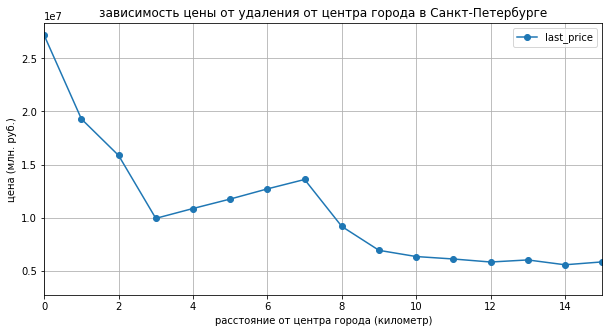

In [292]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)

plt.title('зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('расстояние от центра города (километр)')
plt.ylabel('цена (млн. руб.)')
plt.show()

In [293]:
# Определяем функцию для форматирования числовых значений
def format_price(x):
    return f'{x:.2f}'  # Два знака после запятой

# Создаем сводную таблицу с отформатированными значениями
pivot_table = data.query('locality_name == "санкт-петербург" and distance_city_center < 10') \
                  .pivot_table(values='last_price', index='distance_city_center') \
                  .apply(lambda x: x.apply(format_price))  # Применяем функцию форматирования

print(pivot_table)

                       last_price
distance_city_center             
0.0                   27146922.00
1.0                   19297072.15
2.0                   15869965.69
3.0                    9961604.16
4.0                   10887610.06
5.0                   11775446.17
6.0                   12729646.81
7.0                   13612348.67
8.0                    9202626.25
9.0                    6958211.77


As expected, the most expensive apartments are in the city center and their cost decreases with increasing distance.

## General conclusion

In the process of studying the advertisements for the sale of apartments, the following stages were completed and conclusions were made::

1. In the process of data preprocessing:
- renamed the column name, filled in obvious gaps in the table, rounded off the values ​​to significant values, changed the data type in accordance with the data in the columns;
- calculated and added a column with the price of one square meter of the object;
- allocated data on the day, month and year of publication of the advertisement in separate columns;
- added information on the floor of the apartment (first, last, other) to the table;
- calculated and allocated information on the distance to the city center in km in a separate column.

2. In general, the following conclusions can be made about the advertisements:
- most often presented for sale are 1, 2 and 3-room apartments in 5 and 9-story buildings with a total area of ​​40 to 69 sq. m., a kitchen area of ​​6 and 8 sq. m. m, ceiling height of 2.50 - 2.60 meters, the price of the object is 3 - 5 million rubles;
- the least frequently presented offers for sale of apartments on the first and last floors. The number of such offers is slightly more than 25% of the total number of offers;
- the largest number of offers for sale of apartments in residential areas (at a distance of 12,000 -15,000 meters), as well as at a distance of 5,000 meters from the city center.

At the same time, the number of offers for sale does not greatly depend on the distance from the nearest park. The average distance to the park is ~ 200 - 700 meters.


3. The average time to sell an apartment is ~ 156 days, with the median value being 74 days, which more accurately characterizes the average time to sell, as it does not depend on outliers and non-standard values.

On average, the sale of an average apartment takes 2-3 months, depending on related factors (area, price, distance from the center).

Fast sales can be considered sales that took place in the first quartile (~ 30 days), and unusually long sales after 199 days or more (after the 3rd quartile).

4. With the increase in the total and living area, as well as the number of rooms, the cost of apartments also increases. The price of apartments on the first floor drops sharply. The price of apartments on the top floor decreases less obviously. In general, this trend is understandable, given that most of the offers are apartments in 5 and 9-story buildings - this is an old housing stock and it is obvious that it is impossible to sell apartments on the first floor at the same price as on another floor.

Seasonal dependence of the cost of apartments:
- usually in the fall and before winter there is an increase in sales, so sellers begin to raise the price.

- dependence on the year of sale - everything is obvious here. In 2014, the peak of the cost due to the economic crisis, then a decrease, and then in 2018 again an increase due to a gradual decrease in %% rates on mortgages in the lending market as a whole, as well as the beginning and gradual development of various support programs for buyers (mortgages for young families at a lower %% rate).

5. Among the 10 localities with the largest number of ads, the average price per square meter is about 80 thousand rubles (excluding St. Petersburg and Pushkin, where the average price per square meter is 100 thousand rubles).

6. The highest average cost per square meter, as expected, is in St. Petersburg, followed by Pushkin. The lowest cost per square meter is in Metallostroy, Krasnoe Selo and Murino, which is also obvious (distance from St. Petersburg/unfavorable environment (Murino)).

7. As for advertisements for the sale of apartments in St. Petersburg, everything is also obvious here - in the center, apartments are more expensive, and the further away, the price decreases. 
